In [1]:
import pandas as pd
import nltk
import numpy as np
import string
#nltk.download('stopwords')
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

In [2]:
#read the review data CSV file
rawdata = pd.read_csv('car_reviews.csv')
print(rawdata)
data=rawdata.copy() 

     Sentiment                                             Review
0          Neg   In 1992 we bought a new Taurus and we really ...
1          Neg   The last business trip  I drove to San Franci...
2          Neg   My husband and I purchased a 1990 Ford F250 a...
3          Neg   I feel I have a thorough opinion of this truc...
4          Neg   AS a mother of 3  all of whom are still in ca...
...        ...                                                ...
1377       Pos   In June we bought the Sony Limited Edition Fo...
1378       Pos   After 140 000 miles  we decided to replace my...
1379       Pos   The Ford Focus is a great little record setti...
1380       Pos   I needed a new car because my hyundai excel 9...
1381       Pos   The 2000 Ford Focus SE 4 door sedan has a spa...

[1382 rows x 2 columns]


In [3]:
#convert sentiment to binary values
data.Sentiment[data.Sentiment=='Neg'] = 0
data.Sentiment[data.Sentiment=='Pos'] = 1
data.Sentiment=data.Sentiment.astype('int')


In [4]:
#task1.1

#data preprocessing
#1.tokenize and set lowercase
#2.remove stopwords and punctuations
#demonstrate 1&2 using print data.Review[0] before and after pre-processing

stop_words = set(stopwords.words('english'))  

print('Before pre-processing:',data.Review[0])
for i in range(len(data.Review)):
    word_tokens = word_tokenize(data.Review[i].lower())  #set lowercase
    filtered_sentence = [w for w in word_tokens if not w in stop_words] #remove stopwords
    data.Review[i]=' '.join([w for w in filtered_sentence if w not in string.punctuation]) #remove punctuations
    
#demonstrate that words and punctuation, which are unlikely to affect sentiment, have been excluded
print('After pre-processing:',data.Review[0])

Before pre-processing:  In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I dont think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire 


<ipython-input-4-65c6f92b766a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Review[i]=' '.join([w for w in filtered_sentence if w not in string.punctuation]) #remove punctuations


After pre-processing: 1992 bought new taurus really loved 1999 decided try new taurus care style newer version bought anyway like new car half much liked one thee dash much deep takes lot room find seats comfortable way sides stick strip protect card denting drives nice good pick see hood driver seat judging parking difficult small gas tank would buy taurus would rather 1992 back dont think style nice 1992 mistake change style less month dead battery flat tire


In [5]:
#task1.2
#stemming

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


ps = PorterStemmer()
lem = WordNetLemmatizer()

def stemming(wordslist):
    stemmed_words=[]
    for w in wordslist:
        w=ps.stem(w)
        word=lem.lemmatize(w,"v")
        stemmed_words.append(word)
    return stemmed_words

In [6]:
#task1.2
#demonstrates that words with the same stem have been appropriately recognised and treated as variations of the stem
stem1=['liked', 'likes']
stem2=['lying', 'lied', 'lies']
stem3=['nationality','nations']
stem4=['bought', 'buys']
print(stem1, 'after stemming:', stemming(stem1))
print(stem2, 'after stemming:',stemming(stem2))
print(stem3, 'after stemming:', stemming(stem3))
print(stem4, 'after stemming:', stemming(stem4))

['liked', 'likes'] after stemming: ['like', 'like']
['lying', 'lied', 'lies'] after stemming: ['lie', 'lie', 'lie']
['nationality', 'nations'] after stemming: ['nation', 'nation']
['bought', 'buys'] after stemming: ['buy', 'buy']


In [7]:
#stemming

for i in range(len(data.Review)):
    
    review=data.Review[i]
    lstreview = review.split(" ")
    stemmed_words=stemming(lstreview)
    data.Review[i]=' '.join(stemmed_words) 


#print("Stemmed Sentence:",stemmed_words)
print(data)



<ipython-input-7-a31d554d83ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Review[i]=' '.join(stemmed_words)


      Sentiment                                             Review
0             0  1992 buy new tauru realli love 1999 decid tri ...
1             0  last busi trip drive san francisco go hertz re...
2             0  husband purchas 1990 ford f250 noth problem ow...
3             0  feel thorough opinion truck compar post evalu ...
4             0  mother 3 still carseat logic thing trade 200sx...
...         ...                                                ...
1377          1  june buy soni limit edit focu se 4 dr sedan si...
1378          1  140 000 mile decid replac wife 1990 toyota cam...
1379          1  ford focu great littl record set car first car...
1380          1  need new car hyundai excel 91 decid shop aroun...
1381          1  2000 ford focu se 4 door sedan spaciou interio...

[1382 rows x 2 columns]


In [8]:
#task1.3 feature extraction
#demonstrate that a vector has been created for each review
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
text_vec = cv.fit_transform(data.Review)
print('number of features:',len(cv.get_feature_names()))
print('vector created for data.Review:')
print(text_vec.toarray())

number of features: 10840
vector created for data.Review:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
#task1.3
##demonstrate clearly that a vector has been created for data.Review[0] and data.Review[1]
print('vectors created for data.Review[0] and data.Review[1]:')
print(cv.fit_transform(data.Review[0:2]).toarray())

vectors created for data.Review[0] and data.Review[1]:
[[0 3 1 0 0 0 1 0 1 0 1 0 0 0 3 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0
  0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 2 0 0 0 0 1 1 0 0 0 0 1
  0 1 2 0 3 1 2 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 2 1 0 1 0 1 0
  1 1 3 0 0 1 1 3 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 2]
 [1 0 2 1 1 1 0 1 0 1 0 1 1 2 1 7 0 0 0 1 1 8 1 0 0 0 0 0 0 1 0 2 1 1 1 1
  1 1 2 1 1 0 2 1 1 0 3 1 0 0 1 1 1 0 2 1 0 1 1 0 0 1 3 2 1 2 0 3 1 2 1 0
  1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 2 0 0 2 1 1 1 0 1 1 3 0 2 0 1 0 1
  0 0 0 1 1 0 0 5 0 1 2 1 0 0 1 7 1 4 1 3 1 1 0 0 1 1 1 2]]


In [10]:
#task1.5


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_vec, data.Sentiment, test_size = 0.2
                                                    , random_state = 42, shuffle = True)
#demonstrate 80% of the data has been used to train the classification model
#the remaining 20% of the data set has been used as test data control by test_size=0.2
#data is randomized by using 'random_state = 42, shuffle = True'
print('test size/data size = {:.0%}'.format(len(y_test)/len(data)))
print('train size/data size = {:.0%}'.format(len(y_train)/len(data)))


test size/data size = 20%
train size/data size = 80%


In [11]:
#task1.4 
#Naïve Bayes model has been used through sklearn

from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8086642599277978


              precision    recall  f1-score   support

           0       0.84      0.77      0.81       142
           1       0.78      0.84      0.81       135

    accuracy                           0.81       277
   macro avg       0.81      0.81      0.81       277
weighted avg       0.81      0.81      0.81       277

Confusion Matrix: 
 [[110  32]
 [ 21 114]]


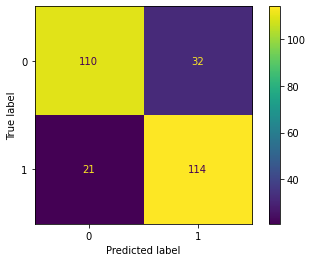


MultinomialNB(unigram) Accuracy:  0.8086642599277978


In [14]:
#task1.5
#output a confusion matrix demonstrating the performance of the Naïve Bayes classifier
#The confusion matrix must clearly indicate 
#the proportion of True Negatives, False Positives, False Negatives and True Positives.

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test ,predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,predicted))
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show() 

print()
print("MultinomialNB(unigram) Accuracy: ", accuracy_score(y_test,predicted))


# Task 2 Improve Solution in Task 1

In task 1, I use CountVectorizer in feature extraction and unigram Naïve Bayes to classify reviews. The accuracy of this method is about 80.87% as shown above.
For task 2, I would like to apply modifications to the Naïve Bayes implementation to improve the accuracy. 

I would use TfidfVectorizer instead of CountVectorizer for converting text data into vectors in the process of feature extraction.

 
## The Reason to Use TfidfVectorizer

### CountVectorizer vs TfidfVectorizer
CountVectorizer can convert a collection of text documents to a matrix of token counts as stated in the document of scikit-learn 0.23.2 [1].
In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. This ends up in ignoring rare words which could have helped is in processing our data more efficiently.

To overcome this, we can use TfidfVectorizer.
TF–IDF, term frequency–inverse document frequency, encoding normalizes the frequency of tokens in a document with respect to the rest of the corpus. TF–IDF is computed on a per-term basis, such that the relevance of a token to a document is measured by the scaled frequency of the appearance of the term in the document, normalized by the inverse of the scaled frequency of the term in the entire corpus [2].

In other words, in TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

So I would expected Naïve Bayes using the TfidfVectorizer to give better performance.



### References:
[1]Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[2]Benjamin Bengfort, Rebecca Bilbro, Tony Ojeda. Applied Text Analysis with Python Chapter 4 Text Vectorization and Transformation Pipelines.



MultinomialNB using TfidfVectorizer Accuracy: 0.8122743682310469
New Confusion Matrix: 
 [[108  34]
 [ 18 117]]


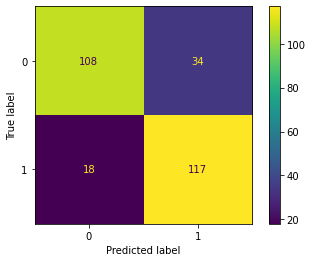

In [15]:
#task2.2
#explain the steps that have been taken to implement the improved approach
#in task 2, to apply TfidfVectorizer we only make changes to the feature extraction step.



##to create vectors for each review, use TfidfVectorizer instead of CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_text_vec = TfidfVectorizer().fit_transform(data.Review)

#use the vectors created by TfidfVectorizer to obtain new train data and new test data
from sklearn.model_selection import train_test_split
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tf_text_vec, data.Sentiment, test_size = 0.2
                                                    , random_state = 42, shuffle = True)

from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
tfclf = MultinomialNB().fit(tfX_train, tfy_train)
tfpredicted= tfclf.predict(tfX_test)
print("MultinomialNB using TfidfVectorizer Accuracy:",metrics.accuracy_score(tfy_test, tfpredicted))
print('New Confusion Matrix: \n', confusion_matrix(tfy_test,tfpredicted))
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tfclf, tfX_test, tfy_test)
plt.show() 

## Comparision
### Compare the Accuracy
The accuracy is about 80.87% in task 1, and increases slightly to 81.23% in task 2. Although it seems that the accuracy improves, we need to note that the accuracy of the two methods is very close.

### Compare the Confusion Matrix
From the two confusion matrices we can see that the number of true positives is 110 in the method of CountVectorizer, while in the method of TfidfVectorizer the number of true positives is 108 which is slightly fewer. For the number of false positives, the method of TfidfVectorizer (117) performs slightly better than   the method of CountVectorizer (114).

So the total number of correct prediction using the method of TfidfVectorizer (225) is only one more than that using the method of CountVectorizer.


In theory, the method of TfidfVectorizer would outperform the method of CountVectorizer. But in this case, it is not very obvious. The reason why this happens may be that the size of the test data is not very large and lack some generalizetion.